In [1]:
!pip install git+https://github.com/jpmorganchase/QOKit.git
!pip install qiskit[visualization] qiskit-optimization qiskit-aer
!pip install mqt.bench
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/jpmorganchase/QOKit.git to /tmp/pip-req-build-ec61b0iq
  Running command git clone --filter=blob:none --quiet https://github.com/jpmorganchase/QOKit.git /tmp/pip-req-build-ec61b0iq
  Resolved https://github.com/jpmorganchase/QOKit.git to commit c0847d291d7a9fd5ffa4b979f0418d215037a8f8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
zsh:1: no matches found: qiskit[visualization]
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable



### **Q1: Evaluating the Effectiveness of Native Gate Sets Across Quantum Hardware Platforms  [6 points]**


---


Consider the following four quantum hardware platforms, each with its own native gate set:

1. IBM (Superconducting)
2. IonQ (Trapped Ions)
3. Quantinuum (Trapped Ions)

**(a)** Using a **technology-agnostic benchmarking approach**, identify which platform’s native gate set is **most effective** in minimizing **circuit depth** and **gate count** across a range of quantum algorithms and problem sizes. Please follow, the following steps

1. **Generate and compile circuits** for the above benchmarks using the MQT Bench tool:  
* https://github.com/cda-tum/mqt-bench
   

2. **Compile each benchmark circuit** to the native gate set of each platform using MQT bench, use benchmarks with qubits 5,10,15,25, 35, 45.
* https://mqt.readthedocs.io/projects/bench/en/latest/Parameter.html




**(b)** Estimate the SWAP overhead for each benchmark for IonQ Aria 1 (25 Qubits),
Quantinuum H2 (32 Qubits), and  IBM Montreal (27 Qubits). Use the connectivity map in the code window below for the machines.



and use the following table to estimate the execution time for benchmarks with qubits 5,10,15,25, 35. Use qiskit's mapping and routing pass. Note use the connectivity specified below, we have altered for pedagogical purposes.

| Platform           | Native Gates                   | Connectivity       | 1Q Gate Time | 2Q Gate Time | Coherence Time (T₁/T₂)     | Readout Latency |
|--------------------|--------------------------------|--------------------|--------------|--------------|-----------------------------|------------------|
| **IonQ Aria 1**    | Arbitrary 1Q, **XX(θ)**         | Somewhat Fully connected    | 10 µs        | 100 µs       | 1,000 ms / 1,000 ms         | 1 ms             |
| **Quantinuum H2**  | Arbitrary 1Q, **ZZ(θ)**         | Somewhat Fully connected    | 10 µs        | 150 µs       | 500 ms / 500 ms             | 1 ms             |
| **IBM Montreal**   | Rx(π/2), Rz(θ), **CX**          | Heavy-hex (sparse) | 20 ns        | 200 ns       | 100 µs / 100 µs             | 200 µs           |
           |

In [2]:

Quantinuum_H2_32=[
 (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7),
 (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7),
 (2, 3), (2, 4), (2, 5), (2, 6), (2, 7),
 (3, 4), (3, 5), (3, 6), (3, 7),
 (4, 5), (4, 6), (4, 7),
 (5, 6), (5, 7),
 (6, 7),
 (7, 8),  # inter-group connection

 (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15),
 (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15),
 (10, 11), (10, 12), (10, 13), (10, 14), (10, 15),
 (11, 12), (11, 13), (11, 14), (11, 15),
 (12, 13), (12, 14), (12, 15),
 (13, 14), (13, 15),
 (14, 15),
 (15, 16),  # inter-group connection

 (16, 17), (16, 18), (16, 19), (16, 20), (16, 21), (16, 22), (16, 23),
 (17, 18), (17, 19), (17, 20), (17, 21), (17, 22), (17, 23),
 (18, 19), (18, 20), (18, 21), (18, 22), (18, 23),
 (19, 20), (19, 21), (19, 22), (19, 23),
 (20, 21), (20, 22), (20, 23),
 (21, 22), (21, 23),
 (22, 23),
 (23, 24),  # inter-group connection

 (24, 25), (24, 26), (24, 27), (24, 28), (24, 29), (24, 30), (24, 31),
 (25, 26), (25, 27), (25, 28), (25, 29), (25, 30), (25, 31),
 (26, 27), (26, 28), (26, 29), (26, 30), (26, 31),
 (27, 28), (27, 29), (27, 30), (27, 31),
 (28, 29), (28, 30), (28, 31),
 (29, 30), (29, 31),
 (30, 31)
]


IonQ_25=[
 (0, 1), (0, 2), (0, 3), (0, 4),
 (1, 2), (1, 3), (1, 4),
 (2, 3), (2, 4),
 (3, 4),
 (4, 5),

 (5, 6), (5, 7), (5, 8), (5, 9),
 (6, 7), (6, 8), (6, 9),
 (7, 8), (7, 9),
 (8, 9),
 (9, 10),

 (10, 11), (10, 12), (10, 13), (10, 14),
 (11, 12), (11, 13), (11, 14),
 (12, 13), (12, 14),
 (13, 14),
 (14, 15),

 (15, 16), (15, 17), (15, 18), (15, 19),
 (16, 17), (16, 18), (16, 19),
 (17, 18), (17, 19),
 (18, 19),
 (19, 20),

 (20, 21), (20, 22), (20, 23), (20, 24),
 (21, 22), (21, 23), (21, 24),
 (22, 23), (22, 24),
 (23, 24)
]


edges_IBM_27 = [
    (0, 1), (1, 2), (2, 3),
    (3, 4), (4, 5), (5, 6),
    (6, 7), (7, 8), (8, 9),
    (1, 10), (3, 11), (5, 12), (7, 13), (9, 14),
    (10, 11), (11, 12), (12, 13), (13, 14),
    (10, 15), (11, 16), (12, 17), (13, 18), (14, 19),
    (15, 16), (16, 17), (17, 18), (18, 19),
    (15, 20), (16, 21), (17, 22), (18, 23), (19, 24),
    (20, 21), (21, 22), (22, 23), (23, 24),
    (21, 25), (23, 26)
]





(c) Estimate the fidelity using noisy simulation for the listed benchmarks for 5- and 10-qubit instances per platform. When estimating the fidelity model idling errors. Use equation (9) and (10) from https://arxiv.org/abs/1404.3747 , assume when gates have no operational dependence we can perform them in parallel and there is no crosstalk. Clearly state **Your conclusion:** Which hardware platform is most effective overall, and why?



| Platform           | 1Q Gate Fidelity       | 2Q Gate Fidelity       | Readout Fidelity                                  |
|--------------------|------------------------|-------------------------|----------------------------------------|
| **IonQ Aria 1**    | 99.9%                | 99%                 |  99.99% |
| **Quantinuum H2**  |  99.97%               | 98%                 |    99.99%        |
| **IBM Montreal**   |  99.9%                | 98.5%               | 97%


---

**Benchmarks:**  
Use the following **representative quantum applications** for your evaluations:

1. Amplitude Estimation (AE)  
2. Graph State Preparation (GSP)
3. Portfolio Optimization with QAOA (PoQAOA)  
4. Portfolio Optimization with VQE  (PoVQE)
5. Quantum Approximate Optimization Algorithm (QAOA)  
6. Quantum Fourier Transform (QFT)  
7. Quantum Neural Network (QNN)  
8. Variational Quantum Eigensolver (VQE)  
9. W-State Preparation (W-state)

---

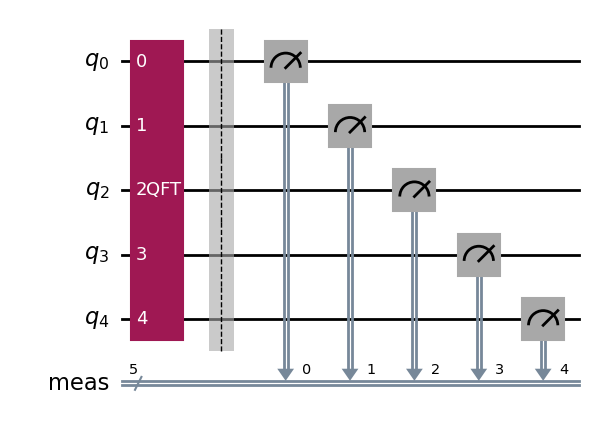

In [3]:
# check if mqt bench is working
from mqt.bench import CompilerSettings, QiskitSettings, TKETSettings, get_benchmark

# get a benchmark circuit on algorithmic level representing the GHZ state with 5 qubits
qc_algorithmic_level = get_benchmark(benchmark_name="qft", level="alg", circuit_size=5)

# draw the circuit
qc_algorithmic_level.draw('mpl')

In [4]:
from qiskit.transpiler.preset_passmanagers.plugin import PassManagerStagePluginManager

plugins = PassManagerStagePluginManager().routing_plugins.names()
print("Available routing plugins:", plugins)

Available routing plugins: ['basic', 'lookahead', 'none', 'sabre', 'stochastic']


# Q1A Code

In [9]:
# Add your code Q1a
import qiskit
from mqt.bench import CompilerSettings, QiskitSettings, TKETSettings
compiler_settings = CompilerSettings(
    qiskit=QiskitSettings(optimization_level=1),
    tket=TKETSettings(placement="lineplacement"),
)
##
#1. Amplitude Estimation (AE)  
#2. Graph State Preparation (GSP)
#3. Portfolio Optimization with QAOA (PoQAOA)  
#4. Portfolio Optimization with VQE  (PoVQE)
#5. Quantum Approximate Optimization Algorithm (QAOA)  
#6. Quantum Fourier Transform (QFT)  
#7. Quantum Neural Network (QNN)  
#8. Variational Quantum Eigensolver (VQE)  
#9. W-State Preparation (W-state)
##
benchmarks = ['ae', 'graphstate', 'portfolioqaoa', 'portfoliovqe', "qaoa", "qft", "qnn", "vqe", "wstate"]
result = {'ibm': [], 'ionq':[], 'quantinuum': []}
for size in [5, 10, 15, 25, 35, 45]:
    for provider in ['ibm', 'ionq', 'quantinuum']:
        depth = 0
        gate_count = 0
        benchmark_count = 0
        for benchmark in benchmarks:
            if benchmark in ['portfolioqaoa', 'portfoliovqe', "qaoa", 'vqe'] and size >= 25: continue
            benchmark_count += 1
            qc_native_gates_level = get_benchmark(
                benchmark_name=benchmark,
                level="nativegates",
                circuit_size=size,
                compiler="qiskit",
                compiler_settings=compiler_settings,
                provider_name=provider,
            )
            depth += qc_native_gates_level.depth()
            gate_count += sum(value for key, value in qc_native_gates_level.count_ops().items())
            print(f"Finished {provider}\'s {size} qubits {benchmark} benchmark")
        result[provider].append((depth / benchmark_count, gate_count / benchmark_count))
print(result)
            


Finished ibm's 5 qubits ae benchmark
Finished ibm's 5 qubits graphstate benchmark
Finished ibm's 5 qubits portfolioqaoa benchmark
Finished ibm's 5 qubits portfoliovqe benchmark
Finished ibm's 5 qubits qaoa benchmark
Finished ibm's 5 qubits qft benchmark
Finished ibm's 5 qubits qnn benchmark
Finished ibm's 5 qubits vqe benchmark
Finished ibm's 5 qubits wstate benchmark
Finished ionq's 5 qubits ae benchmark
Finished ionq's 5 qubits graphstate benchmark
Finished ionq's 5 qubits portfolioqaoa benchmark
Finished ionq's 5 qubits portfoliovqe benchmark
Finished ionq's 5 qubits qaoa benchmark
Finished ionq's 5 qubits qft benchmark
Finished ionq's 5 qubits qnn benchmark
Finished ionq's 5 qubits vqe benchmark
Finished ionq's 5 qubits wstate benchmark
Finished quantinuum's 5 qubits ae benchmark
Finished quantinuum's 5 qubits graphstate benchmark
Finished quantinuum's 5 qubits portfolioqaoa benchmark
Finished quantinuum's 5 qubits portfoliovqe benchmark
Finished quantinuum's 5 qubits qaoa benchmar

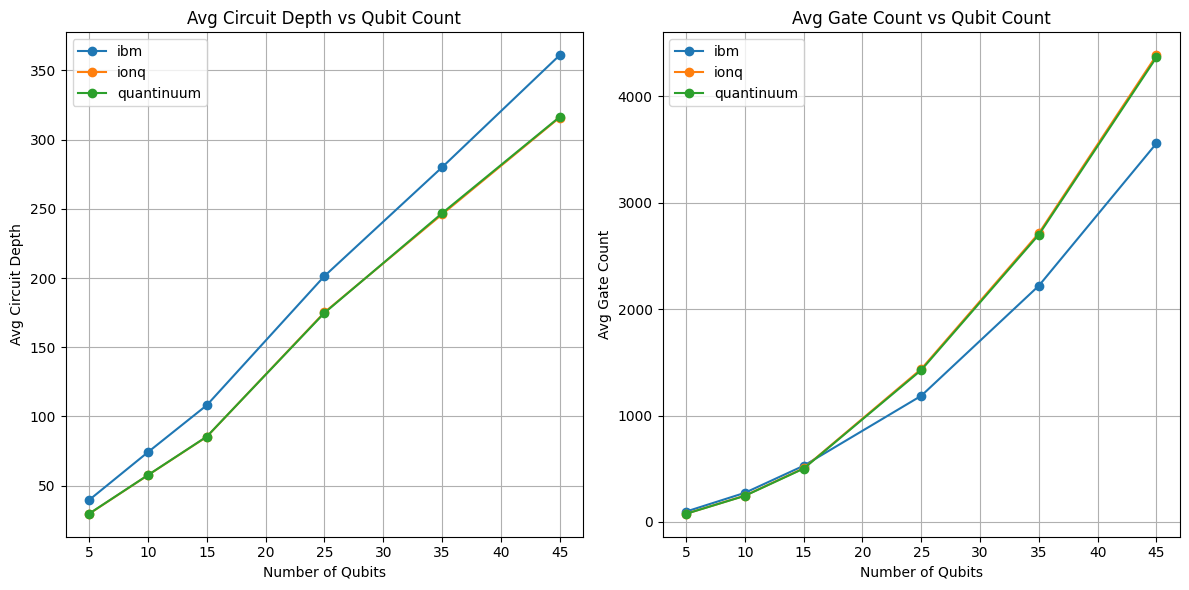

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
providers=['ibm', 'ionq', 'quantinuum']
sizes=[5, 10, 15, 25, 35, 45]
# Plot 1: Circuit Depth
plt.subplot(1, 2, 1)
for provider in providers:
    depths = [entry[0] for entry in result[provider]]
    plt.plot(sizes, depths, marker='o', label=provider)
plt.xlabel('Number of Qubits')
plt.ylabel('Avg Circuit Depth')
plt.title('Avg Circuit Depth vs Qubit Count')
plt.grid(True)
plt.legend()

# Plot 2: Gate Count
plt.subplot(1, 2, 2)
for provider in providers:
    gate_counts = [entry[1] for entry in result[provider]]
    plt.plot(sizes, gate_counts, marker='o', label=provider)
plt.xlabel('Number of Qubits')
plt.ylabel('Avg Gate Count')
plt.title('Avg Gate Count vs Qubit Count')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Q1A Analysis
Ionq and Quantinuum's native op set has pretty good and similiar result. IBM, compare to ionq and quantinuum, requires more depth and less gate count with same qubit numbers. 

# Q1B Code

In [14]:
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import CouplingMap
from qiskit.circuit.library import QFT

# Define custom coupling maps
Quantinuum_H2_32 = CouplingMap(Quantinuum_H2_32)

IonQ_25 = CouplingMap(IonQ_25)

edges_IBM_27 = CouplingMap(edges_IBM_27)

# Device configuration database
DEVICE_CONFIG = {
    'ibm_montreal': {
        'coupling_map': edges_IBM_27,
        'basis_gates': ['rz', 'sx', 'x', 'cx', 'measure'],
        'gate_times': {
            '1q': 20e-9,   # 20 ns
            '2q': 200e-9, # 200 ns
            'readout': 200e-6
        }
    },
    'ionq_aria1': {
        'coupling_map': IonQ_25,
        'basis_gates': ['rxx', 'rz', 'ry', 'rx', 'measure'],
        'gate_times': {
            '1q': 10e-6,   # 10 µs
            '2q': 100e-6,  # 100 µs
            'readout': 1e-3
        }
    },
    'quantinuum_h2': {
        'coupling_map': Quantinuum_H2_32,
        'basis_gates': ['rzz', 'rz', 'ry', 'rx', 'measure'],
        'gate_times': {
            '1q': 10e-6,   # 10 µs
            '2q': 150e-6,  # 150 µs
            'readout': 1e-3
        }
    }
}

result = {'ibm': [], 'ionq': [], 'quantinuum': []}
sizes = [5, 10, 15, 25]

for size in sizes:
    for machine in DEVICE_CONFIG.keys():
        exec_time = 0
        benchmark_count = 0
        for benchmark in benchmarks:
            if benchmark in ['portfolioqaoa', 'portfoliovqe', "qaoa", 'vqe'] and size >= 25: continue
            benchmark_count += 1
            qc = get_benchmark(
                    benchmark_name=benchmark,
                    level=0,
                    circuit_size=size
                )
            
            # Get device config
            config = DEVICE_CONFIG[machine]
            
            # Transpile with device-specific settings
            transpiled_qc = transpile(
                qc,
                coupling_map=config['coupling_map'],
                basis_gates=config['basis_gates'],
                optimization_level=1,
                routing_method='sabre',
                layout_method='sabre'
            )
            
            # Count gates
            num_1q = transpiled_qc.count_ops().get('x', 0) + \
                    transpiled_qc.count_ops().get('rx', 0) + \
                    transpiled_qc.count_ops().get('rz', 0) + \
                    transpiled_qc.count_ops().get('sx', 0) + \
                    transpiled_qc.count_ops().get('ry', 0)     
            
            num_2q = transpiled_qc.count_ops().get('cx', 0) + \
                    transpiled_qc.count_ops().get('rxx', 0) + \
                    transpiled_qc.count_ops().get('rzz', 0) + \
                    transpiled_qc.count_ops().get('swap', 0) 
            
            # Calculate execution time
            exec_time += (num_1q * config['gate_times']['1q'] +
                        num_2q * config['gate_times']['2q'] +
                        config['gate_times']['readout'])
            print(f"Finished {provider}'s {size} qubits {benchmark} benchmark")
        provider = machine.split('_')[0]
        result[provider].append(exec_time / benchmark_count)

print(result)

Finished ionq's 5 qubits ae benchmark
Finished ionq's 5 qubits graphstate benchmark
Finished ionq's 5 qubits portfolioqaoa benchmark
Finished ionq's 5 qubits portfoliovqe benchmark
Finished ionq's 5 qubits qaoa benchmark
Finished ionq's 5 qubits qft benchmark
Finished ionq's 5 qubits qnn benchmark
Finished ionq's 5 qubits vqe benchmark
Finished ionq's 5 qubits wstate benchmark
Finished ibm's 5 qubits ae benchmark
Finished ibm's 5 qubits graphstate benchmark
Finished ibm's 5 qubits portfolioqaoa benchmark
Finished ibm's 5 qubits portfoliovqe benchmark
Finished ibm's 5 qubits qaoa benchmark
Finished ibm's 5 qubits qft benchmark
Finished ibm's 5 qubits qnn benchmark
Finished ibm's 5 qubits vqe benchmark
Finished ibm's 5 qubits wstate benchmark
Finished ionq's 5 qubits ae benchmark
Finished ionq's 5 qubits graphstate benchmark
Finished ionq's 5 qubits portfolioqaoa benchmark
Finished ionq's 5 qubits portfoliovqe benchmark
Finished ionq's 5 qubits qaoa benchmark
Finished ionq's 5 qubits qft

KeyboardInterrupt: 

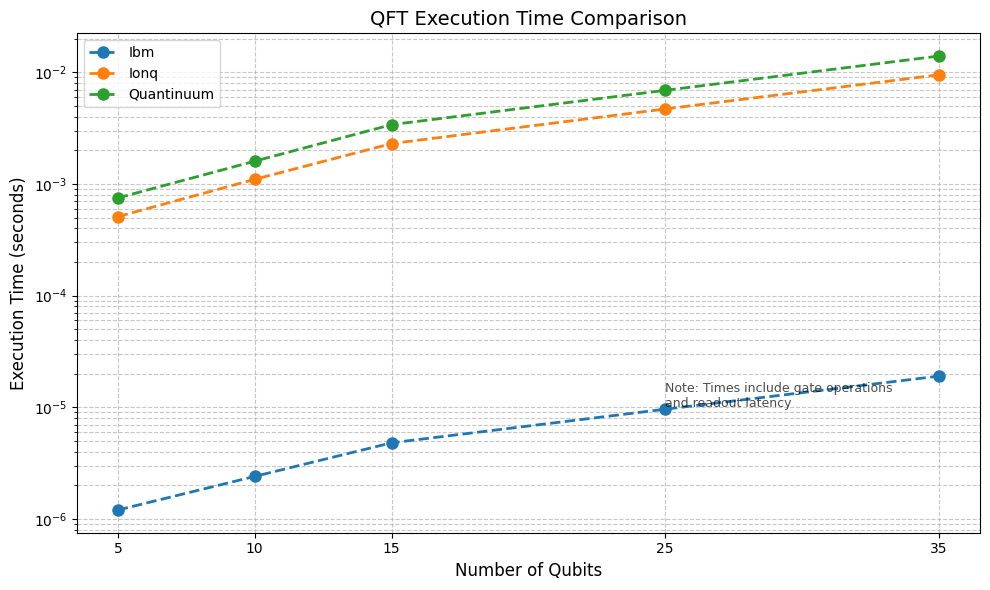

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sizes = [5, 10, 15, 25]

plt.figure(figsize=(10, 6))
plt.title('QFT Execution Time Comparison', fontsize=14)
plt.xlabel('Number of Qubits', fontsize=12)
plt.ylabel('Execution Time (seconds)', fontsize=12)
plt.yscale('log')  # Logarithmic scale for better visibility

# Plot each provider's data
for provider, times in result.items():
    plt.plot(sizes, times, 
             marker='o', 
             linestyle='--',
             linewidth=2,
             markersize=8,
             label=provider.capitalize())

plt.xticks(sizes)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Add annotation
plt.text(25, 1e-5, 'Note: Times include gate operations\nand readout latency',
         fontsize=9, alpha=0.7)

# Save and show
plt.savefig('qft_benchmark.png', dpi=300)
plt.show()

# Q1B Analysis
On QFT benchmark, IBM's machine has much better performance than the other two

# Q1C Code

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import CouplingMap

# Define platform configurations (simplified coupling maps for brevity)
DEVICE_CONFIG = {
    "ibm_montreal": {
        "coupling_map": CouplingMap(edges_IBM_27),  # Simplified heavy-hex
        "basis_gates": ["rz", "sx", "x", "cx"],
        "gate_times": {"1q": 20e-9, "2q": 200e-9},
        "readout_latency": 200e-6,
        "T1": 100e-6,   # 100 µs
        "T2": 100e-6,
        "1q_fidelity": 0.999,
        "2q_fidelity": 0.985,
        "readout_fidelity": 0.97
    },
    "ionq_aria1": {
        "coupling_map": CouplingMap(IonQ_25),  # Simplified fully-connected group
        "basis_gates": ["rx", "ry", "rz", "rxx"],
        "gate_times": {"1q": 10e-6, "2q": 100e-6},
        "readout_latency": 1e-3,
        "T1": 1000e-3,  # 1000 ms
        "T2": 1000e-3,
        "1q_fidelity": 0.999,
        "2q_fidelity": 0.99,
        "readout_fidelity": 0.9999
    },
    "quantinuum_h2": {
        "coupling_map": CouplingMap(Quantinuum_H2_32),  # Simplified connected group
        "basis_gates": ["rx", "ry", "rz", "rzz"],
        "gate_times": {"1q": 10e-6, "2q": 150e-6},
        "readout_latency": 1e-3,
        "T1": 500e-3,  # 500 ms
        "T2": 500e-3,
        "1q_fidelity": 0.9997,
        "2q_fidelity": 0.98,
        "readout_fidelity": 0.9999
    }
}

def calculate_execution_time(transpiled_circuit, config):
    """Compute execution time with parallel gate execution."""
    layers = []
    current_layer = []
    used_qubits = set()
    
    for instr in transpiled_circuit.data:
        # Get qubit indices correctly
        qubits = [transpiled_circuit.qubits.index(q) for q in instr.qubits]  # <-- Fix here
        
        if any(q in used_qubits for q in qubits):
            layers.append(current_layer)
            current_layer = [instr]
            used_qubits = set(qubits)
        else:
            current_layer.append(instr)
            used_qubits.update(qubits)
    if current_layer:
        layers.append(current_layer)
    
    t_exec = 0
    for layer in layers:
        max_duration = 0
        for instr in layer:
            num_qubits = len(instr.qubits)
            duration = config["gate_times"]["2q"] if num_qubits == 2 else config["gate_times"]["1q"]
            max_duration = max(max_duration, duration)
        t_exec += max_duration
    return t_exec + config["readout_latency"]

def estimate_fidelity(transpiled_circuit, config):
    num_qubits = transpiled_circuit.num_qubits
    num_1q = sum(1 for instr in transpiled_circuit.data if len(instr.qubits) == 1)
    num_2q = sum(1 for instr in transpiled_circuit.data if len(instr.qubits) == 2)
    
    # Gate fidelity
    f_gate = (config["1q_fidelity"] ** num_1q) * (config["2q_fidelity"] ** num_2q)
    
    # Execution time and idling error
    t_exec = calculate_execution_time(transpiled_circuit, config)
    f_idle = (np.exp(-t_exec / config["T1"]) * np.exp(-t_exec / config["T2"])) ** num_qubits
    
    # Readout fidelity
    f_readout = config["readout_fidelity"] ** num_qubits
    
    return f_gate * f_idle * f_readout

# Benchmark QFT for 5 and 10 qubits
results = {}
sizes = [5, 10]

for size in sizes:
    qc = QuantumCircuit(size)
    qc.compose(QFT(size), inplace=True)
    
    platform_results = {}
    for platform, config in DEVICE_CONFIG.items():
        transpiled_qc = transpile(
            qc,
            basis_gates=config["basis_gates"],
            coupling_map=config["coupling_map"],
            optimization_level=3
        )
        fidelity = estimate_fidelity(transpiled_qc, config)
        platform_results[platform] = fidelity
    results[size] = platform_results

# Print results
for size in sizes:
    print(f"\n--- {size}-Qubit QFT Fidelity ---")
    for platform, fidelity in results[size].items():
        print(f"{platform:15}: {fidelity:.2%}")


--- 5-Qubit QFT Fidelity ---
ibm_montreal   : 0.00%
ionq_aria1     : 78.00%
quantinuum_h2  : 57.71%

--- 10-Qubit QFT Fidelity ---
ibm_montreal   : 0.00%
ionq_aria1     : 21.43%
quantinuum_h2  : 9.01%


# Q1C Analysis
In conclusion, IonQ Aria 1 is the best machine overall on QFT benchmark, which has low circuit depth and gate count, with the best QFT fidelity.